# Lab 3: Point Operations
### 1. Objectives
This lab introduces and explores fundamental point operations for image enhancement, focusing on grayscale images. We will apply basic intensity transformations, histogram processing, and arithmetic operations to enhance and analyze images.
### 2. Submission Guidelines:
- **File Format:** Ensure your submission is a Jupyter Notebook file.
- **File Naming Convention:** Rename your lab file in the following format:
    - Lab2_StudentFullName_StudentID.ipynb
- **Submission:** Please submit the zip file of Jupyter Notebook file to Moodle after you have completed.
    - Lab2_StudentFullName_StudentID.zip
### 3. Preparation
Before we begin, ensure you have the necessary libraries installed. We'll be primarily using `numpy` for numerical operations and `matplotlib` and `opencv` (`cv2`) for image loading, processing, and display.

In [1]:
pip install ipykernel opencv-python numpy matplotlib scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import required libraries

In [2]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Loading and Grayscale Conversion
All operations in this lab will be performed on **grayscale images**. We'll load our sample images and convert them to grayscale if they aren't already.

##### Sample Grayscale Images

For this lab, we'll use three sample grayscale images that represent different exposure levels:

1. **Overexposed Image**: An image that is too bright.
2. **Underexposed Image**: An image that is too dark.
3. **Binary Image**: A black-and-white image (containing only 0s and 255s).

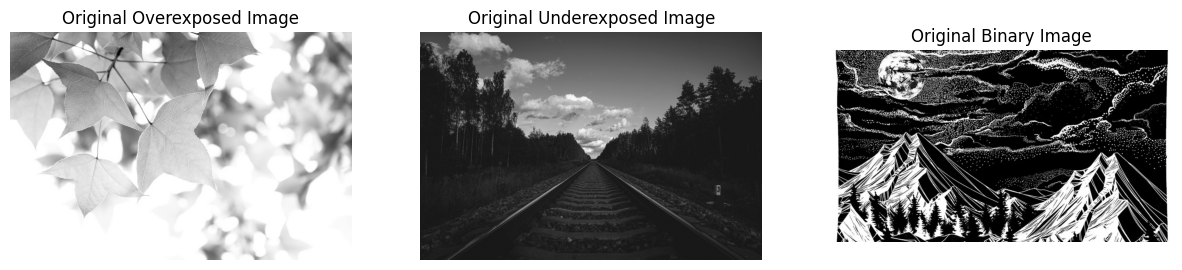

In [3]:
img_overexposed = cv2.imread('overexposed_image.jpg', cv2.IMREAD_GRAYSCALE)
img_underexposed = cv2.imread('underexposed_image.jpg', cv2.IMREAD_GRAYSCALE)
img_binary = cv2.imread('binary_image.jpg', cv2.IMREAD_GRAYSCALE)

if img_overexposed is None or img_underexposed is None or img_binary is None:
    print("Error: Could not load one or more images. Please check the paths.")
else:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_overexposed, cmap='gray')
    axes[0].set_title('Original Overexposed Image')
    axes[0].axis('off')
    axes[1].imshow(img_underexposed, cmap='gray')
    axes[1].set_title('Original Underexposed Image')
    axes[1].axis('off')
    axes[2].imshow(img_binary, cmap='gray')
    axes[2].set_title('Original Binary Image')
    axes[2].axis('off')
    plt.show()

#### Assignment 1: Negative Image
The negative of an image is obtained by reversing the intensity levels. For an 8-bit grayscale image where pixel values range from 0 to 255, the negative transformation for a pixel $r$ is given by $s=L−1−r$, where $L$ is the number of gray levels (256 for 8-bit images). This operation is useful for enhancing white or gray detail embedded in dark regions of an image.

**Task**:
- Transform all three grayscale images (overexposed, underexposed, binary) into their negative form.
- Illustrate clearly how the intensity values change from original to negative for a few example pixel values.

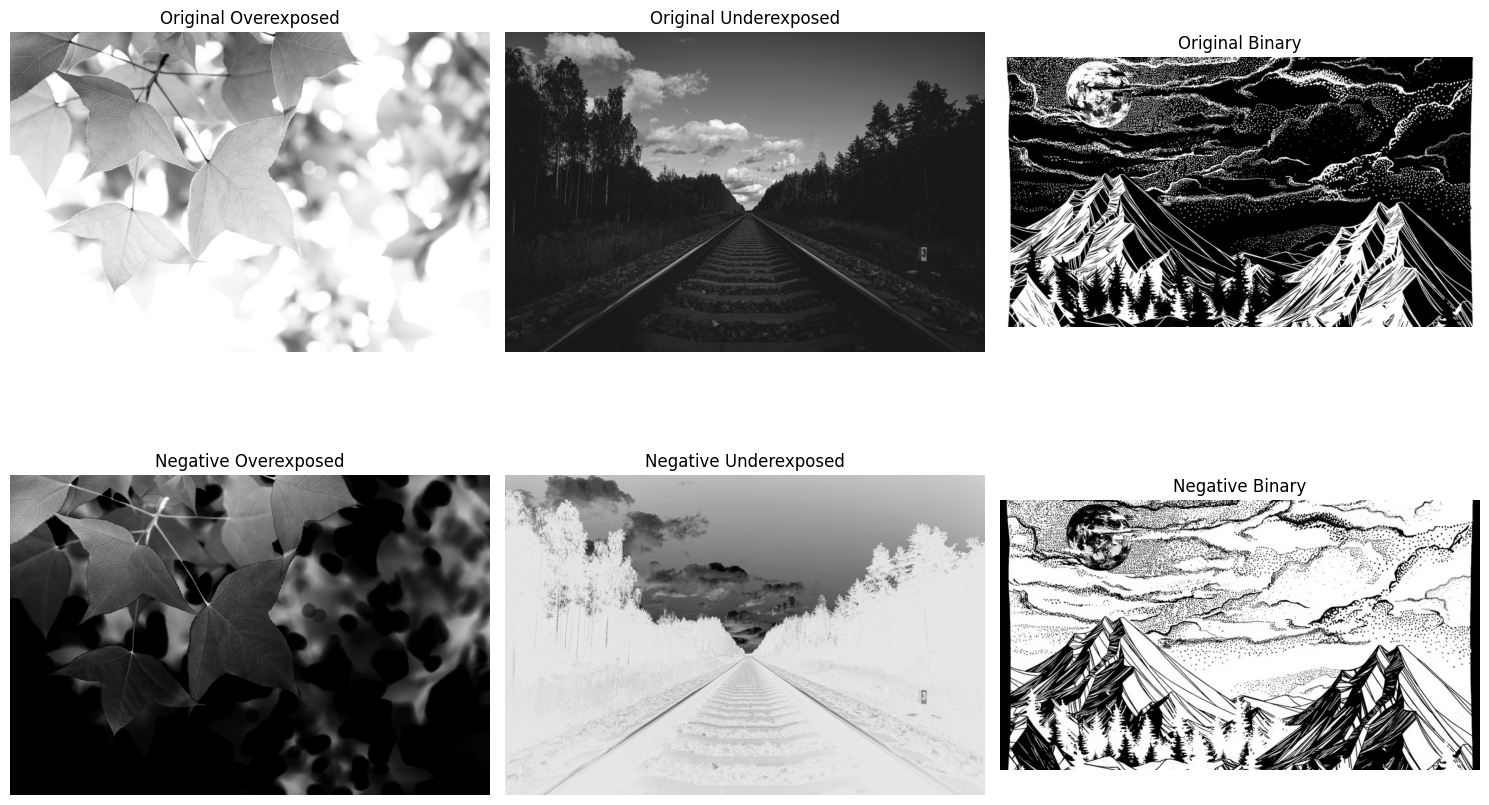


--- Intensity Value Change Illustration (Negative Transformation) ---
Original Pixel Value | Negative Pixel Value
---------------------|---------------------
        0            |         255
       50            |         205
      128            |         127
      200            |         55
      255            |         0


In [4]:
# TODO: Create a function to perform negative transformation
def negative_transform(image):
    return 255 - image

img_overexposed_neg = negative_transform(img_overexposed)
img_underexposed_neg = negative_transform(img_underexposed)
img_binary_neg = negative_transform(img_binary)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img_overexposed, cmap='gray')
axes[0, 0].set_title('Original Overexposed')
axes[0, 0].axis('off')
axes[1, 0].imshow(img_overexposed_neg, cmap='gray')
axes[1, 0].set_title('Negative Overexposed')
axes[1, 0].axis('off')
axes[0, 1].imshow(img_underexposed, cmap='gray')
axes[0, 1].set_title('Original Underexposed')
axes[0, 1].axis('off')
axes[1, 1].imshow(img_underexposed_neg, cmap='gray')
axes[1, 1].set_title('Negative Underexposed')
axes[1, 1].axis('off')
axes[0, 2].imshow(img_binary, cmap='gray')
axes[0, 2].set_title('Original Binary')
axes[0, 2].axis('off')
axes[1, 2].imshow(img_binary_neg, cmap='gray')
axes[1, 2].set_title('Negative Binary')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

print("\n--- Intensity Value Change Illustration (Negative Transformation) ---")
print("Original Pixel Value | Negative Pixel Value")
print("---------------------|---------------------")
print(f"        0            |         {negative_transform(np.array([0]))[0]}")
print(f"       50            |         {negative_transform(np.array([50]))[0]}")
print(f"      128            |         {negative_transform(np.array([128]))[0]}")
print(f"      200            |         {negative_transform(np.array([200]))[0]}")
print(f"      255            |         {negative_transform(np.array([255]))[0]}")

#### Assignment 2: Thresholding (Binary Conversion)
Thresholding is a fundamental operation used to convert a grayscale image into a binary image. A threshold value $T$ is chosen, and all pixel values above $T$ are set to one value (e.g., 255 for white), and all pixel values below or equal to $T$ are set to another value (e.g., 0 for black).

**Task**:
- Convert both the **overexposed** and **underexposed** grayscale images into binary (black-and-white) images using thresholding.
- Select an appropriate threshold value for each image and observe the result.

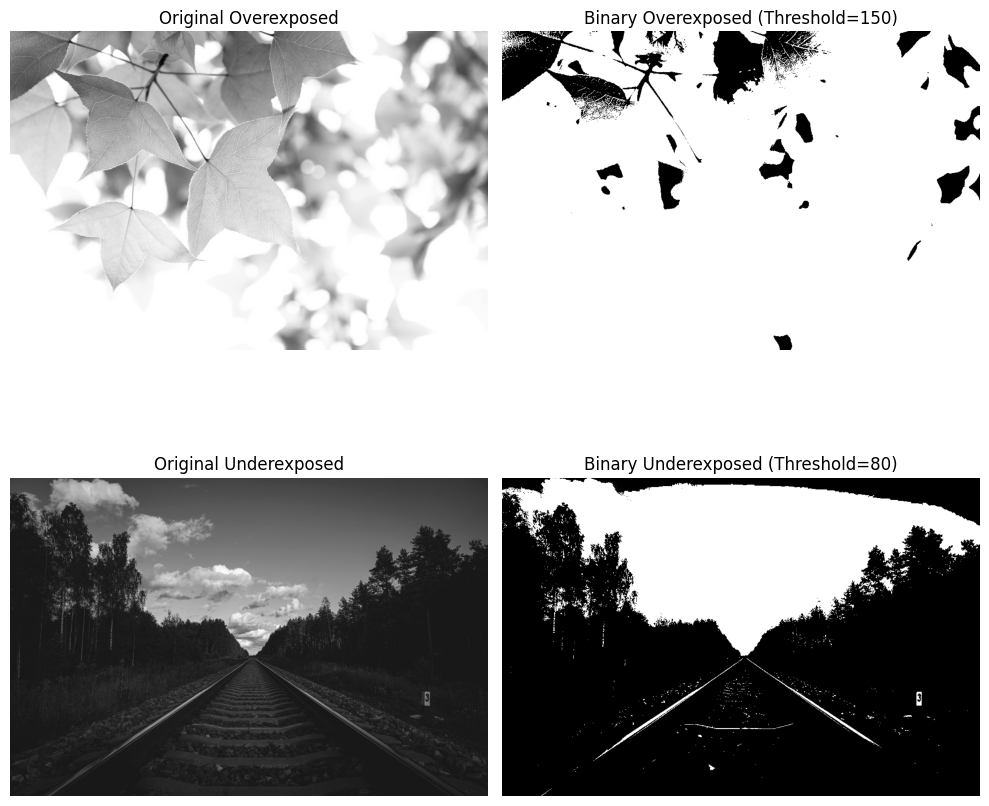

In [ ]:
# TODO: Create a function to perform thresholding
def threshold_image(image, threshold):

    binary_image = np.zeros_like(image)
    binary_image[image > threshold] = 255
    return binary_image

img_overexposed_binary = threshold_image(img_overexposed, 150)  # Example threshold for overexposed
img_underexposed_binary = threshold_image(img_underexposed, 80)  # Example threshold for underexposed

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(img_overexposed, cmap='gray')
axes[0, 0].set_title('Original Overexposed')
axes[0, 0].axis('off')
axes[0, 1].imshow(img_overexposed_binary, cmap='gray')
axes[0, 1].set_title(f'Binary Overexposed (Threshold={150})')
axes[0, 1].axis('off')
axes[1, 0].imshow(img_underexposed, cmap='gray')
axes[1, 0].set_title('Original Underexposed')
axes[1, 0].axis('off')
axes[1, 1].imshow(img_underexposed_binary, cmap='gray')
axes[1, 1].set_title(f'Binary Underexposed (Threshold={80})')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

#### Assignment 3: Log Transformation dùng làm sáng vùng tối
Logarithmic transformation maps a narrow range of low-intensity values in the input image to a wider range of output values. This effectively expands the dark regions, making details in these areas more visible. The general form of the log transformation is $s=c.log(1+r)$, where $r$ is the input pixel value, $s$ is the output pixel value, and $c$ is a scaling constant.

![Logarithmic Transformation Example](log_dist.png)

**Task**:
- Apply logarithmic transformation to the **underexposed** image to enhance details in its darker regions.

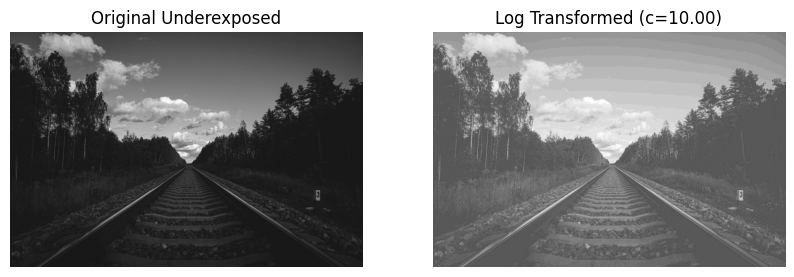

In [ ]:
# TODO: Create a function to perform log transformation
def log_transform(image, c):

    image_float = image.astype(np.float64)
    log_image = c * np.log(1 + image_float)
    return log_image

c_log = 10 # You can adjust this constant to control the log transformation effect
img_underexposed_log = log_transform(img_underexposed, c_log)
img_underexposed_log = np.clip(img_underexposed_log, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_underexposed, cmap='gray')
axes[0].set_title('Original Underexposed')
axes[0].axis('off')
axes[1].imshow(img_underexposed_log, cmap='gray')
axes[1].set_title(f'Log Transformed (c={c_log:.2f})')
axes[1].axis('off')
plt.show()

#### Assignment 4: Power-law (Gamma) Transformation Biến đổi hàm mũ (Gamma)

Power-law transformation, also known as gamma correction, is used to correct for the non-linear response of display devices (like monitors) or to adjust the overall brightness and contrast of an image. The transformation is given by $s = c r^{\gamma}$, where $r$ is the input pixel value, $s$ is the output pixel value, $c$ is a scaling constant (often 1 if values are normalized), and gamma ($\gamma$) is the exponent.

- If ${\gamma} < 1$, the transformation maps a narrow range of dark input values to a wider range of output values, brightening the image.
- If  ${\gamma} > 1$, the transformation maps a wider range of dark input values to a narrower range of output values, darkening the image.

**Task**:
- Perform gamma correction using power-law transformation on the **overexposed** and **underexposed** images.

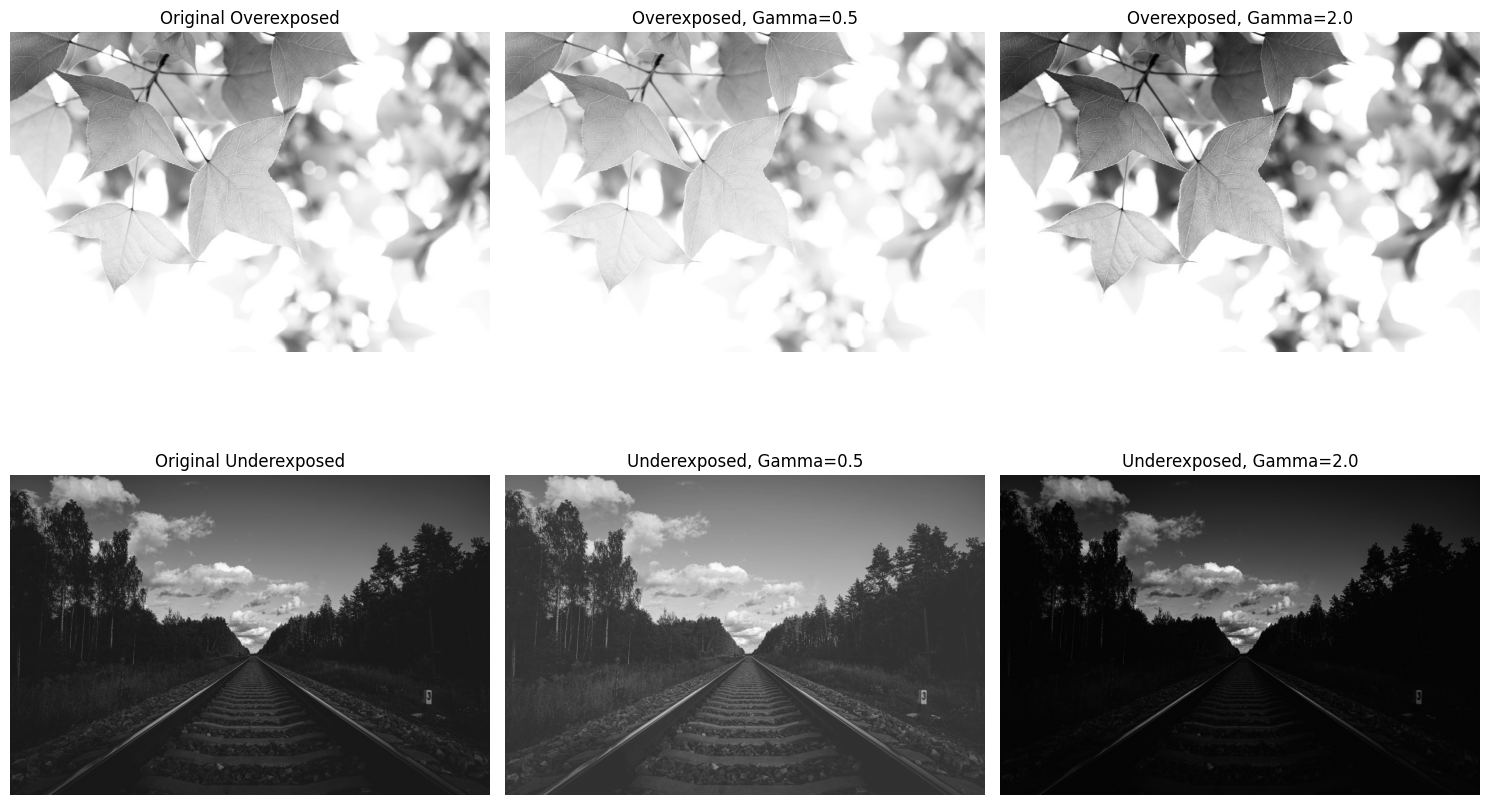

In [ ]:
# TODO: Create a function for gamma correction (power-law transformation)
# Guide: normalize pixel values to [0, 1], apply gamma, then scale back to [0, 255]
def gamma_transform(image, gamma):
    normalized = image.astype(np.float64) / 255.0
    gamma_corrected = np.power(normalized, gamma)
    result = (gamma_corrected * 255).astype(np.uint8)
    return result

# --- Experiment with Overexposed Image ---
gamma_over_low = 0.5 # Example: Gamma < 1 to darken
gamma_over_high = 2.0 # Example: Gamma > 1 to brighten (less common for overexposed)

img_overexposed_gamma_low = gamma_transform(img_overexposed, gamma_over_low)
img_overexposed_gamma_high = gamma_transform(img_overexposed, gamma_over_high)

# --- Experiment with Underexposed Image ---
gamma_under_low = 0.5 # Example: Gamma < 1 to brighten
gamma_under_high = 2.0 # Example: Gamma > 1 to darken

img_underexposed_gamma_low = gamma_transform(img_underexposed, gamma_under_low)
img_underexposed_gamma_high = gamma_transform(img_underexposed, gamma_under_high)


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# Overexposed
axes[0, 0].imshow(img_overexposed, cmap='gray')
axes[0, 0].set_title('Original Overexposed')
axes[0, 0].axis('off')
axes[0, 1].imshow(img_overexposed_gamma_low, cmap='gray')
axes[0, 1].set_title(f'Overexposed, Gamma={gamma_over_low}')
axes[0, 1].axis('off')
axes[0, 2].imshow(img_overexposed_gamma_high, cmap='gray')
axes[0, 2].set_title(f'Overexposed, Gamma={gamma_over_high}')
axes[0, 2].axis('off')
# Underexposed
axes[1, 0].imshow(img_underexposed, cmap='gray')
axes[1, 0].set_title('Original Underexposed')
axes[1, 0].axis('off')
axes[1, 1].imshow(img_underexposed_gamma_low, cmap='gray')
axes[1, 1].set_title(f'Underexposed, Gamma={gamma_under_low}')
axes[1, 1].axis('off')
axes[1, 2].imshow(img_underexposed_gamma_high, cmap='gray')
axes[1, 2].set_title(f'Underexposed, Gamma={gamma_under_high}')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

#### Assignment 5: Bit-plane Slicing
Bit-plane slicing is a technique used to decompose a grayscale image into its individual bit-planes. An 8-bit grayscale image is composed of 8 bit-planes, where each plane represents the contribution of a specific bit (from the least significant bit (LSB) to the most significant bit (MSB)) to the overall pixel intensity. This technique helps in understanding the contribution of different bits to the visual appearance of an image.

**Task**:
- Decompose one grayscale image (e.g., the **overexposed** image) into its 8 constituent bit-planes.
- Select up to 4 of these bit-planes, recombine them, and reconstruct an approximation of the original image.

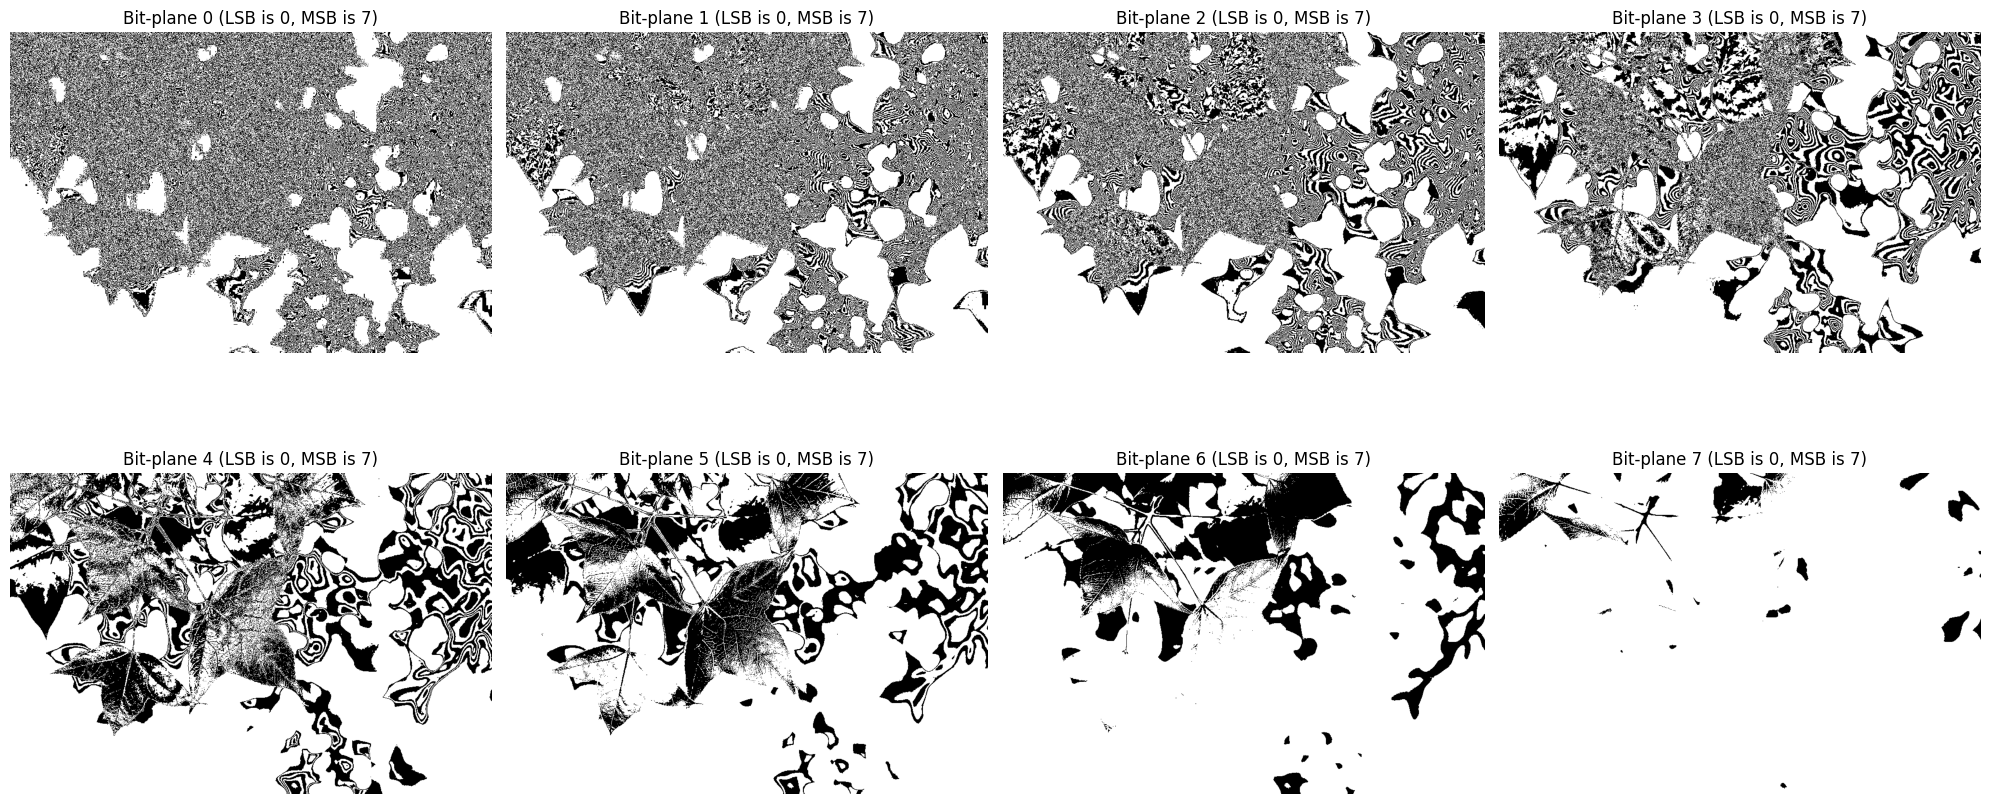

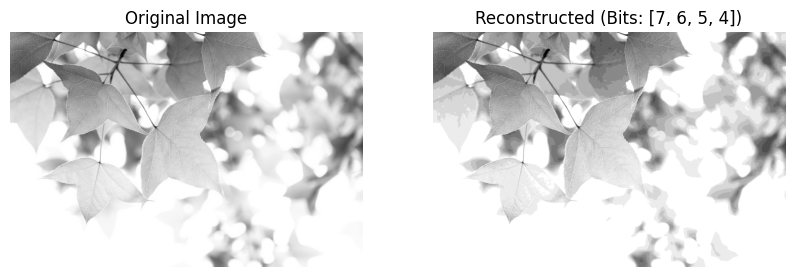

In [5]:
# TODO: Create a function for bit-plane slicing
def get_bit_plane(image, bit):
    bit_plane = (image >> bit) & 1
    return bit_plane * 255

img_for_bps = img_overexposed.copy()
bit_planes = [get_bit_plane(img_for_bps, i) for i in range(8)]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, plane in enumerate(bit_planes):
    axes[i].imshow(plane, cmap='gray')
    axes[i].set_title(f'Bit-plane {i} (LSB is 0, MSB is 7)')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# --- Reconstruct image from selected bit-planes ---
selected_bit_planes_indices = [7, 6, 5, 4]
reconstructed_image = np.zeros_like(img_for_bps, dtype=np.uint16) # Use uint16 to prevent overflow during summation
for bit_idx in selected_bit_planes_indices:
    reconstructed_image += (bit_planes[bit_idx] // 255) * (2**bit_idx)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

# Display original and reconstructed image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_for_bps, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title(f'Reconstructed (Bits: {selected_bit_planes_indices})')
axes[1].axis('off')
plt.show()

#### Assignment 6: Histogram Equalization
Histogram equalization is a technique used to enhance the contrast of an image by redistributing the intensity values. It aims to create an output image whose pixels are spread more uniformly across the entire grayscale range, making areas of lower contrast more distinguishable.

Using `cv2.equalizeHist`:
OpenCV provides a very straightforward function, `cv2.equalizeHist()`, to perform global histogram equalization.
- **Input**: It takes a single-channel (grayscale) image as input. If you try to pass a color image directly, it will throw an error. For color images, you typically convert them to a color space like YCbCr or HSV, equalize the luminance (Y or V) channel, and then convert back.
- **Output**: It returns a new image with the equalized histogram.

**Task**:
- Plot histograms of the **underexposed** image before and after applying histogram equalization.

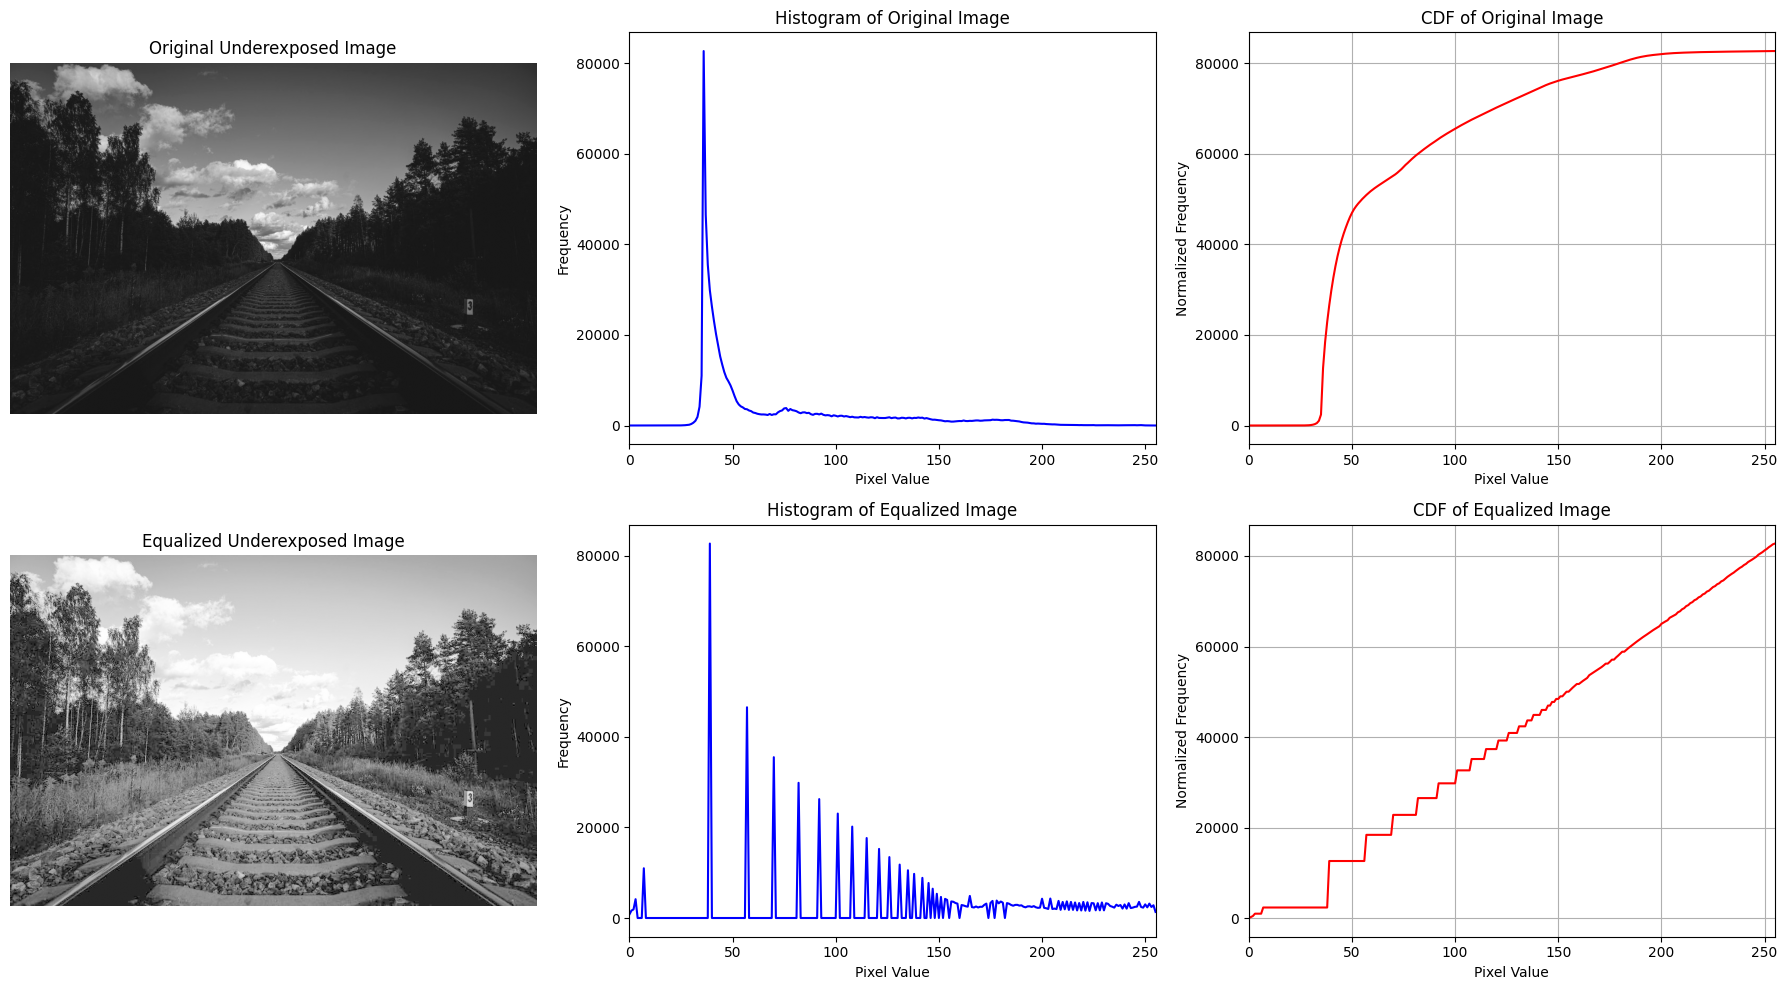

In [14]:
hist_original = cv2.calcHist([img_underexposed], [0], None, [256], [0, 256])
cdf_original = hist_original.cumsum()
cdf_normalized_original = cdf_original * hist_original.max() / cdf_original.max()

# TODO: Apply histogram equalization using cv2.equalizeHist
img_underexposed_equalized = cv2.equalizeHist(img_underexposed)

hist_equalized = cv2.calcHist([img_underexposed_equalized], [0], None, [256], [0, 256])
cdf_equalized = hist_equalized.cumsum()
cdf_normalized_equalized = cdf_equalized * hist_equalized.max() / cdf_equalized.max()


fig, axes = plt.subplots(2, 3, figsize=(18, 10)) # Adjusted subplot layout

axes[0, 0].imshow(img_underexposed, cmap='gray')
axes[0, 0].set_title('Original Underexposed Image')
axes[0, 0].axis('off')
axes[0, 1].plot(hist_original, color='blue')
axes[0, 1].set_title('Histogram of Original Image')
axes[0, 1].set_xlabel('Pixel Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim([0, 255])
axes[0, 2].plot(cdf_normalized_original, color='red')
axes[0, 2].set_title('CDF of Original Image')
axes[0, 2].set_xlabel('Pixel Value')
axes[0, 2].set_ylabel('Normalized Frequency')
axes[0, 2].set_xlim([0, 255])
axes[0, 2].grid(True)
axes[1, 0].imshow(img_underexposed_equalized, cmap='gray')
axes[1, 0].set_title('Equalized Underexposed Image')
axes[1, 0].axis('off')
axes[1, 1].plot(hist_equalized, color='blue')
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim([0, 255])
axes[1, 2].plot(cdf_normalized_equalized, color='red')
axes[1, 2].set_title('CDF of Equalized Image')
axes[1, 2].set_xlabel('Pixel Value')
axes[1, 2].set_ylabel('Normalized Frequency')
axes[1, 2].set_xlim([0, 255])
axes[1, 2].grid(True)
plt.tight_layout()
plt.show()

#### Assignment 7: Histogram Matching (Specification)
Histogram matching, also known as histogram specification, is a technique used to transform the intensity values of an image so that its histogram matches the histogram of a reference image (or a specified target histogram). This allows for a more controlled contrast enhancement than histogram equalization.

While manual implementation involves calculating and inverting Cumulative Distribution Functions (CDFs), libraries like scikit-image provide convenient functions to perform this operation efficiently.

Using `skimage.exposure.match_histograms`:
- **Input**: It takes the **image** to be transformed and the **reference** image whose histogram you want to match.
- **Output**: It returns a new image whose histogram approximately matches that of the reference image.

**Syntax:**
```python
from skimage import exposure
matched_image = exposure.match_histograms(source_image, reference_image)
```

**Task**:
- Use histogram matching to alter the histogram of the **overexposed** image to resemble the histogram of the **underexposed** image, and vice versa.
- Display and compare the resulting images and their histograms.

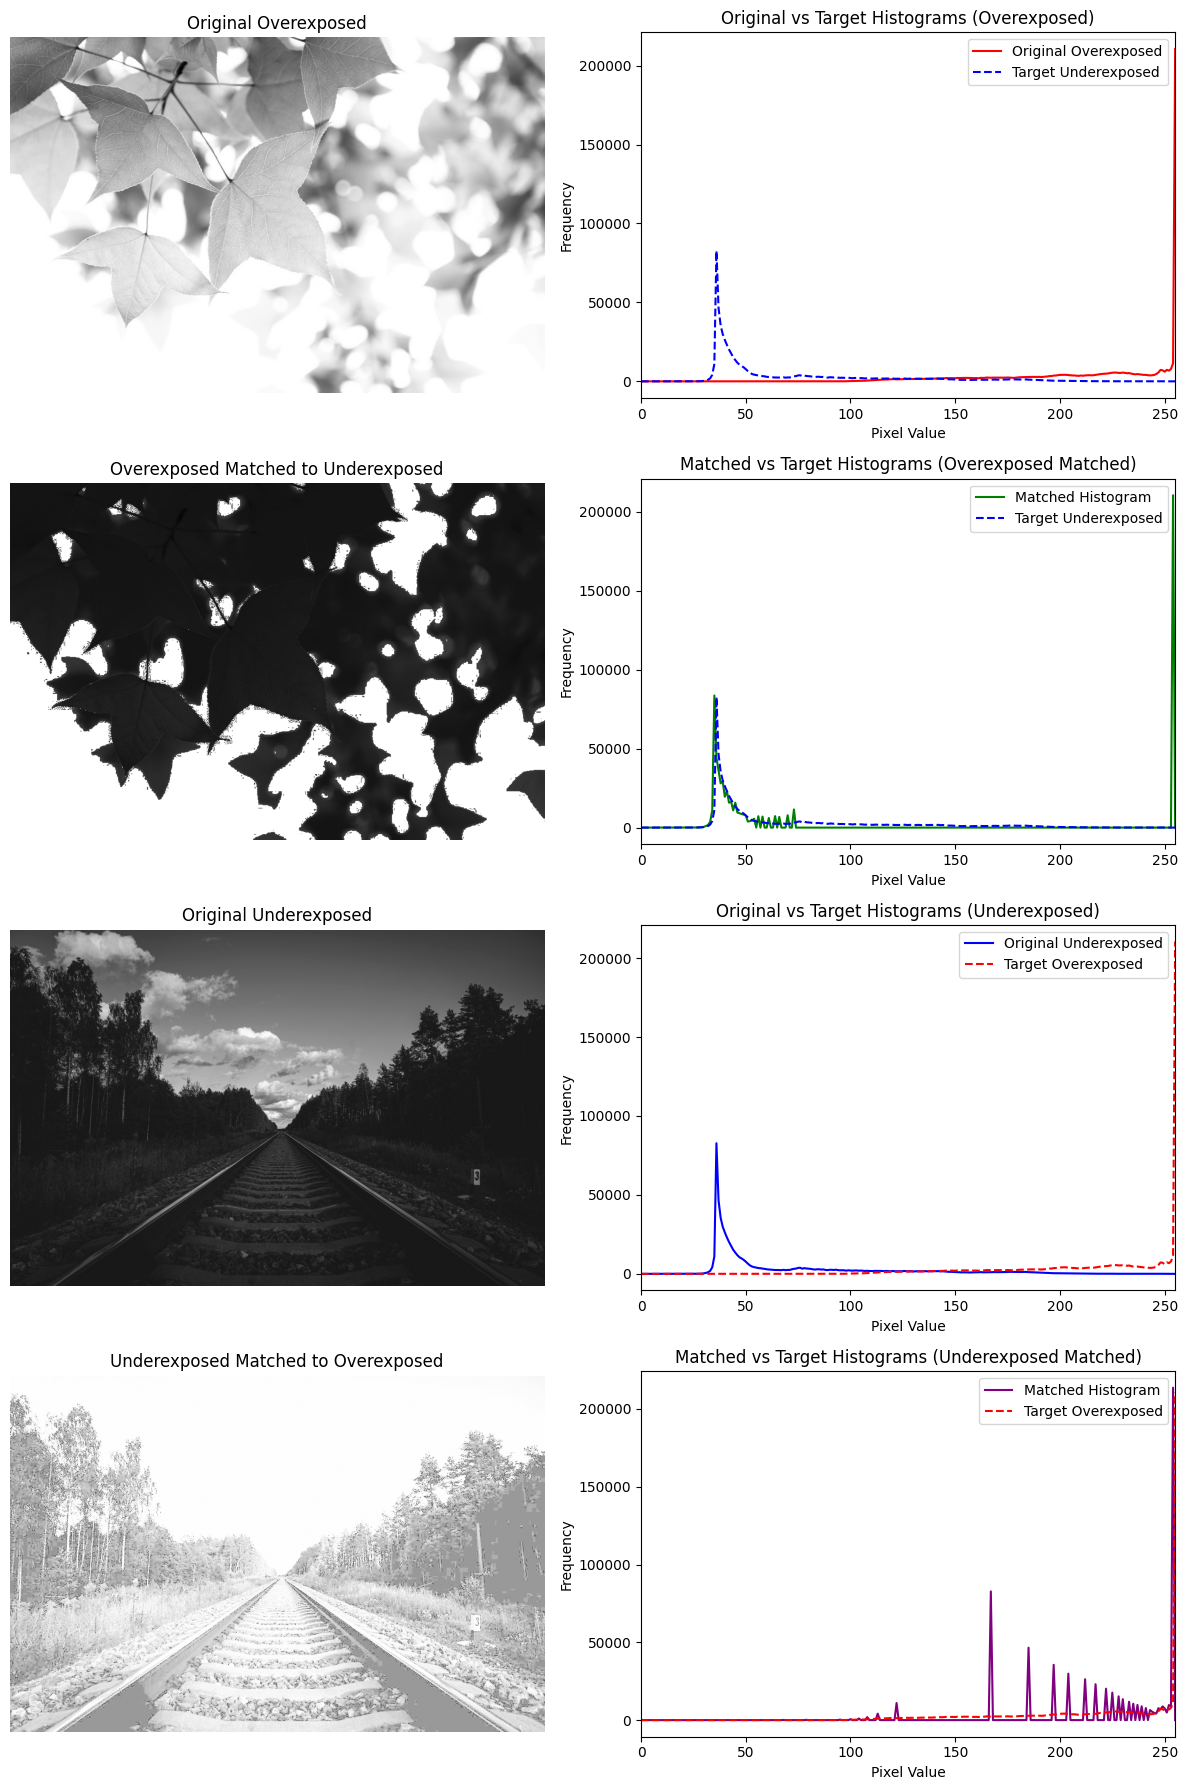

In [15]:
from skimage import exposure

# Calculate original histograms for comparison
hist_overexposed = cv2.calcHist([img_overexposed], [0], None, [256], [0, 256])
hist_underexposed = cv2.calcHist([img_underexposed], [0], None, [256], [0, 256])

# --- Histogram Matching: Overexposed to Underexposed ---
# TODO: Complete the histogram matching to create img_over_to_under
img_over_to_under = exposure.match_histograms(img_overexposed, img_underexposed)
img_over_to_under = img_over_to_under.astype(np.uint8)
hist_over_to_under = cv2.calcHist([img_over_to_under], [0], None, [256], [0, 256])

# --- Histogram Matching: Underexposed to Overexposed ---
# TODO: Complete the histogram matching to create img_under_to_over
img_under_to_over = exposure.match_histograms(img_underexposed, img_overexposed)
img_under_to_over = img_under_to_over.astype(np.uint8)
hist_under_to_over = cv2.calcHist([img_under_to_over], [0], None, [256], [0, 256])

fig, axes = plt.subplots(4, 2, figsize=(12, 18))

# Row 1: Overexposed and its target histogram
axes[0, 0].imshow(img_overexposed, cmap='gray')
axes[0, 0].set_title('Original Overexposed')
axes[0, 0].axis('off')
axes[0, 1].plot(hist_overexposed, color='red', label='Original Overexposed')
axes[0, 1].plot(hist_underexposed, color='blue', linestyle='--', label='Target Underexposed')
axes[0, 1].set_title('Original vs Target Histograms (Overexposed)')
axes[0, 1].set_xlabel('Pixel Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].set_xlim([0, 255])

# Row 2: Overexposed matched to Underexposed
axes[1, 0].imshow(img_over_to_under, cmap='gray')
axes[1, 0].set_title('Overexposed Matched to Underexposed')
axes[1, 0].axis('off')
axes[1, 1].plot(hist_over_to_under, color='green', label='Matched Histogram')
axes[1, 1].plot(hist_underexposed, color='blue', linestyle='--', label='Target Underexposed')
axes[1, 1].set_title('Matched vs Target Histograms (Overexposed Matched)')
axes[1, 1].set_xlabel('Pixel Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].set_xlim([0, 255])

# Row 3: Underexposed and its target histogram
axes[2, 0].imshow(img_underexposed, cmap='gray')
axes[2, 0].set_title('Original Underexposed')
axes[2, 0].axis('off')
axes[2, 1].plot(hist_underexposed, color='blue', label='Original Underexposed')
axes[2, 1].plot(hist_overexposed, color='red', linestyle='--', label='Target Overexposed')
axes[2, 1].set_title('Original vs Target Histograms (Underexposed)')
axes[2, 1].set_xlabel('Pixel Value')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].legend()
axes[2, 1].set_xlim([0, 255])

# Row 4: Underexposed matched to Overexposed
axes[3, 0].imshow(img_under_to_over, cmap='gray')
axes[3, 0].set_title('Underexposed Matched to Overexposed')
axes[3, 0].axis('off')
axes[3, 1].plot(hist_under_to_over, color='purple', label='Matched Histogram')
axes[3, 1].plot(hist_overexposed, color='red', linestyle='--', label='Target Overexposed')
axes[3, 1].set_title('Matched vs Target Histograms (Underexposed Matched)')
axes[3, 1].set_xlabel('Pixel Value')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].legend()
axes[3, 1].set_xlim([0, 255])


plt.tight_layout()
plt.show()

#### Assignment 8: Image Subtraction
Image subtraction is a pixel-wise operation where the intensity value of each pixel in one image is subtracted from the corresponding pixel in another image. It is often used for detecting differences between images, such as in medical imaging or industrial inspection. For binary images, it can be used to isolate specific regions or remove common elements.

**Task:**
- Apply image subtraction technique to transform the provided **binary image** entirely into a black image.

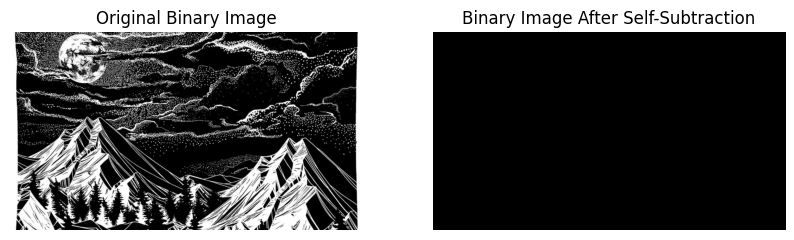

In [16]:
# TODO: Substract the binary image "img_binary" from itself
img_binary_subtracted = img_binary - img_binary

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_binary, cmap='gray')
axes[0].set_title('Original Binary Image')
axes[0].axis('off')
axes[1].imshow(img_binary_subtracted, cmap='gray')
axes[1].set_title('Binary Image After Self-Subtraction')
axes[1].axis('off')
plt.show()

#### Assignment 8: Image Averaging
Image averaging is a technique used to reduce random noise in an image by combining multiple noisy images of the same scene. By averaging the pixel values at each corresponding location across several images, the random noise tends to cancel out, leading to a clearer, less noisy result. It can also be used to blend images with different exposures.

**Task:**
- Average the pixel values of the **underexposed** and **overexposed** images to create a balanced exposure.

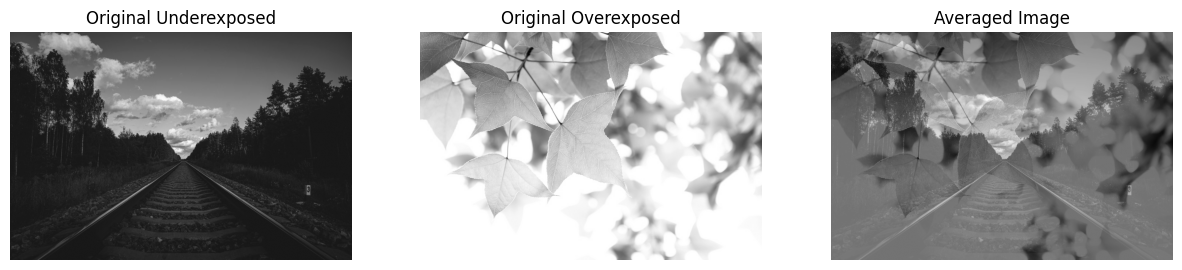

In [17]:
# TODO: Average the underexposed and overexposed images
img_averaged = (img_underexposed.astype(np.float64) + img_overexposed.astype(np.float64)) / 2
img_averaged = img_averaged.astype(np.uint8)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_underexposed, cmap='gray')
axes[0].set_title('Original Underexposed')
axes[0].axis('off')
axes[1].imshow(img_overexposed, cmap='gray')
axes[1].set_title('Original Overexposed')
axes[1].axis('off')
axes[2].imshow(img_averaged, cmap='gray')
axes[2].set_title('Averaged Image')
axes[2].axis('off')
plt.show()